In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import os
import shutil
from _utils import *

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
dir_results = "./Burkina Faso/output_test"
dir_hyper_params = "./Burkina Faso/output_hyperparameter_tuning"
dir_output = "./Burkina Faso/images"

In [4]:
if os.path.exists(dir_output):
    shutil.rmtree(dir_output) 
os.makedirs(dir_output)

## Hyper-parameters tuning results

In [5]:
hyper_params = pd.read_csv(dir_hyper_params + "/hyperparameter_tuning.csv")

result = hyper_params.groupby(["split", "h"]).apply(lambda x: x["loss_to_minimize"].idxmin())
best_result = hyper_params.loc[result].set_index(["split", "h"])
best_result.head()

1 Month Anomaly Rainfalls (%)  3 Months Anomaly Rainfalls (%)  Code  \
split h                                                                        
1     1                              1                               1     1   
      2                              0                               1     1   
      3                              0                               0     1   
      4                              0                               0     1   
      5                              0                               0     1   

         Day  FCG  Fatalities  Month  NDVI Anomaly  Population  \
split h                                                          
1     1    1    1           0      1             0           1   
      2    1    1           1      1             0           1   
      3    1    1           1      1             1           1   
      4    1    1           1      1             0           1   
      5    1    1           1      1             0           1   

         Price cereals and tubers  ...  subsample  attempt  train_loss  \
split h                            ...                                   
1     1                         1  ...       0.75      576    0.544031   
      2                         0  ...       0.90      155    1.206878   
      3                         1  ...       0.80      582    1.977009   
      4                         0  ...       0.60      410    2.839166   
      5                         1  ...       0.85      460    3.725519   

         val_loss  r2_train    r2_val  shape_train  shape_val  r2_difference  \
split h                                                                        
1     1  0.767921  0.998384  0.998391   (3588, 22)  (897, 22)       0.000008   
      2  1.707832  0.996404  0.996422   (3575, 23)  (897, 23)       0.000018   
      3  2.837690  0.994094  0.994055   (3562, 25)  (897, 25)       0.000040   
      4  4.060205  0.991495  0.991494   (3549, 22)  (897, 22)       0.000002   
      5  5.331307  0.988810  0.988831   (3536, 24)  (897, 24)       0.000021   

         loss_to_minimize  
split h                    
1     1          0.000490  
      2          0.001091  
      3          0.001799  
      4          0.002553  
      5          0.003372  

[5 rows x 31 columns]

In [6]:
shapes = best_result[["shape_train", "shape_val"]].applymap(lambda x: eval(x)).unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])

In [7]:
shapes_list = list()
def decompose(x):
    dec = x.apply(pd.Series)
    dec.columns = pd.MultiIndex.from_product([[x.name[0]], [x.name[1], x.name[1] + "_features"]], names = ["Split", "Info"])
    shapes_list.append(dec)

shapes.apply(decompose)
shapes_list = pd.concat(shapes_list, axis = 1).rename({"shape_train": "train_points", "shape_val": "val_points", 
                                                       "shape_train_features": "features"}, axis = 1, level = 1)
shapes_list.drop("shape_val_features", axis = 1, level = 1, inplace = True)
shapes_list.head()

Split            1                                2                      \
Info  train_points features val_points train_points features val_points   
h                                                                         
1             3588       22        897         3900       26        975   
2             3575       23        897         3887       27        975   
3             3562       25        897         3874       26        975   
4             3549       22        897         3861       21        975   
5             3536       24        897         3848       23        975   

Split            3                                4                      \
Info  train_points features val_points train_points features val_points   
h                                                                         
1             4212       25       1066         4524       28       1144   
2             4212       21       1053         4524       23       1131   
3             4199       22       1053         4511       21       1131   
4             4186       21       1053         4498       21       1131   
5             4173       21       1053         4485       19       1131   

Split            5                      
Info  train_points features val_points  
h                                       
1             4849       24       1222  
2             4836       26       1222  
3             4836       24       1209  
4             4823       27       1209  
5             4810       23       1209

In [8]:
r2_results_hyper = best_result[["r2_train", "r2_val"]].unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])
r2_results_hyper.head()

split         1                   2                   3                   4  \
       r2_train    r2_val  r2_train    r2_val  r2_train    r2_val  r2_train   
h                                                                             
1      0.998384  0.998391  0.998186  0.998188  0.997686  0.997658  0.997431   
2      0.996404  0.996422  0.995841  0.995829  0.994910  0.994909  0.994908   
3      0.994094  0.994055  0.993324  0.993322  0.991695  0.991698  0.991799   
4      0.991495  0.991494  0.990533  0.990529  0.988139  0.988136  0.987969   
5      0.988810  0.988831  0.987907  0.987890  0.985010  0.984961  0.982737   

split                   5            
         r2_val  r2_train    r2_val  
h                                    
1      0.996849  0.997835  0.992038  
2      0.993374  0.994800  0.982720  
3      0.989350  0.991916  0.972682  
4      0.984650  0.987741  0.962304  
5      0.979490  0.984731  0.952860

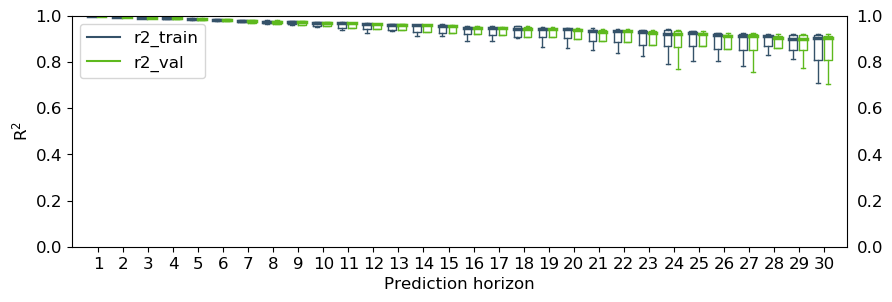

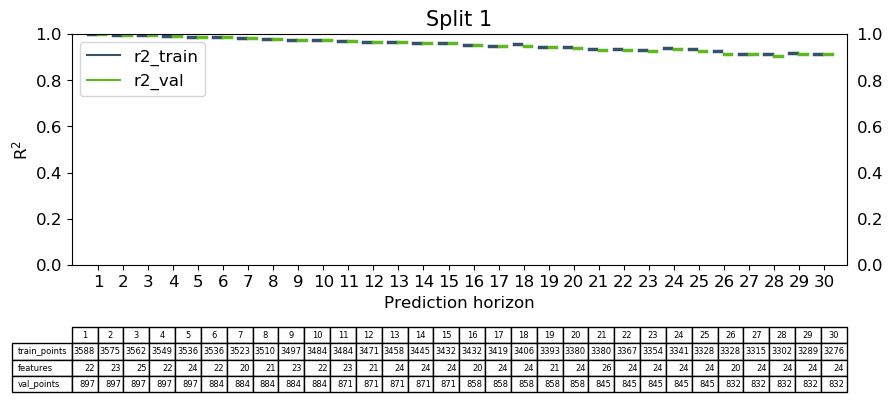

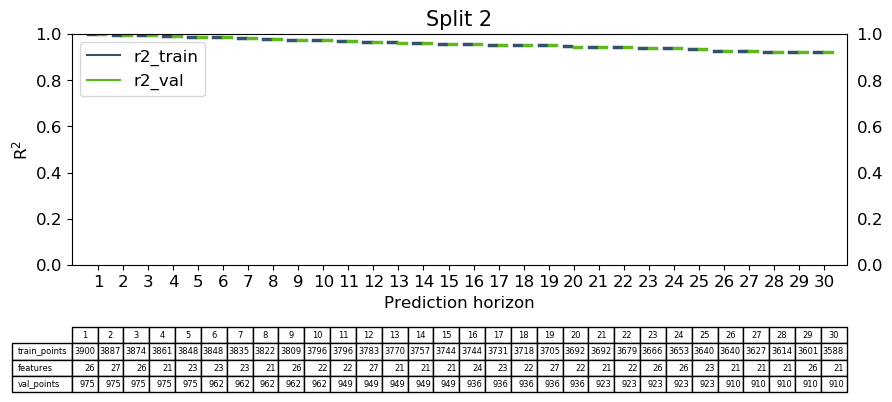

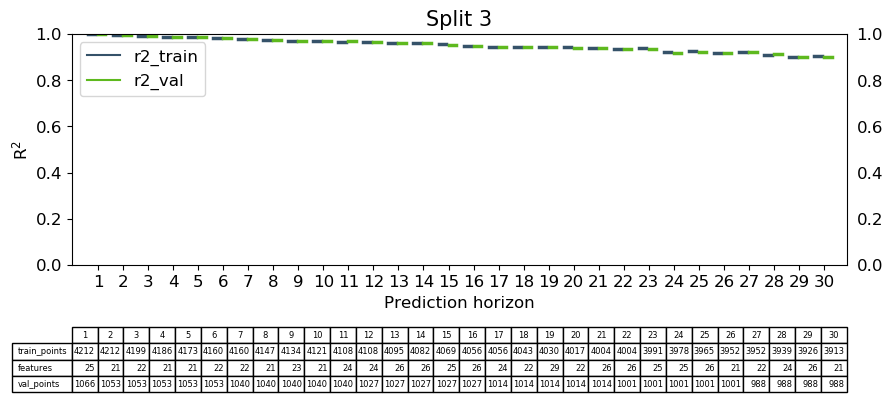

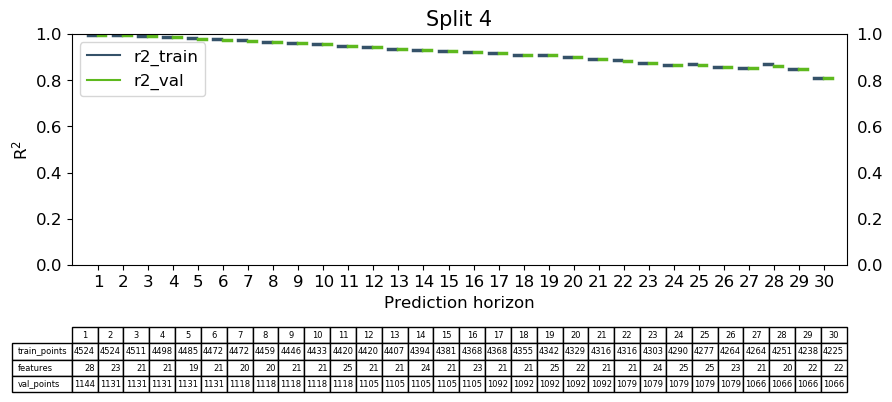

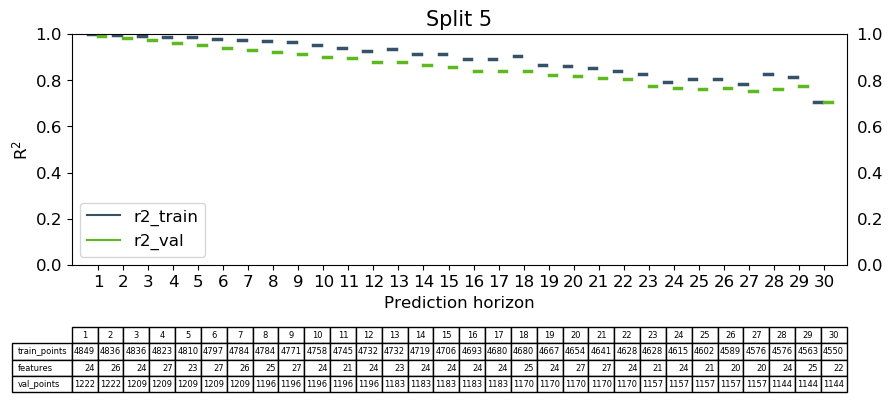

In [9]:
SPLITS = r2_results_hyper.columns.get_level_values(0).unique()

fig, ax = plt.subplots(figsize = (10, 3))    
plot_r2_box_plot(r2_results_hyper, ax, "r2_train", "r2_val", color1 = "#355269", color2 = "#5eb91e")
fig.savefig(dir_output + f"/r2_hyper.png" , bbox_inches = "tight", dpi = 300)
for split in SPLITS:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results_hyper[[split]], ax, "r2_train", "r2_val", title = f"Split {split}",
                     table = shapes_list[split].transpose(), color1 = "#355269", color2 = "#5eb91e");

# Forecasting

In [10]:
# Load forecasting results.
xls = pd.ExcelFile(dir_results + "/forecast.xlsx")

forecast_splits = dict()
for i,split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        # Reset the index.
        forecast_split.index = np.arange(1, len(forecast_split) + 1)
        forecast_split.index.names = ["Prediction horizon"]
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.head()

Split 1                                          \
Country                 Burkina Faso                                           
AdminStrata        Boucle-Du-Mouhoun                     Cascades              
Indicator                        FCG   Forecast    Naive      FCG   Forecast   
Prediction horizon                                                             
1                            80.9589  80.844755  81.2324  33.9317  33.990950   
2                            80.5047  80.879484  81.2324  33.0037  33.906427   
3                            80.2015  80.823085  81.2324  31.7584  33.821725   
4                            79.1929  80.695959  81.2324  31.7584  33.742400   
5                            78.5430  80.518512  81.2324  32.2303  33.674005   

                                                                     ...  \
Country                                                              ...   
AdminStrata                   Centre                     Centre-Est  ...   
Indicator             Naive      FCG   Forecast    Naive        FCG  ...   
Prediction horizon                                                   ...   
1                   34.1368  35.3221  35.564828  35.5006    59.4253  ...   
2                   34.1368  36.2266  35.309101  35.5006    59.6293  ...   
3                   34.1368  37.1590  35.096191  35.5006    60.8748  ...   
4                   34.1368  36.4013  34.925936  35.5006    60.8748  ...   
5                   34.1368  36.5361  34.798173  35.5006    62.2471  ...   

                        Split 5                                              \
Country            Burkina Faso                                               
AdminStrata                Nord Plateau-Central                       Sahel   
Indicator                 Naive             FCG   Forecast   Naive      FCG   
Prediction horizon                                                            
1                       52.1859         62.3412  63.187536  63.098  59.0376   
2                       52.1859         62.4464  63.196152  63.098  59.0376   
3                       52.1859         62.4464  63.176455  63.098  59.0376   
4                       52.1859         62.7769  63.144233  63.098  57.6159   
5                       52.1859         64.5978  63.115271  63.098  57.5419   

                                                                      
Country                                                               
AdminStrata                            Sud-Ouest                      
Indicator            Forecast    Naive       FCG   Forecast    Naive  
Prediction horizon                                                    
1                   59.790600  59.5935   45.3436  46.949396  46.4763  
2                   60.241578  59.5935   46.4661  47.035869  46.4763  
3                   60.609846  59.5935   46.4661  47.200931  46.4763  
4                   60.905412  59.5935   41.9023  47.432589  46.4763  
5                   61.138282  59.5935   42.0061  47.718850  46.4763  

[5 rows x 195 columns]

In [11]:
training_shape = pd.read_csv(dir_results + "/training_shapes.csv", header = [0,1], index_col = 0)
training_shape.head()

Split         Split 1                  Split 2                  Split 3  \
Info  training points features training points features training points   
1                4485       22            4875       26            5278   
2                4472       23            4862       27            5265   
3                4459       25            4849       26            5252   
4                4446       22            4836       21            5239   
5                4433       24            4823       23            5226   

Split                  Split 4                  Split 5           
Info  features training points features training points features  
1           25            5668       28            6071       24  
2           21            5655       23            6058       26  
3           22            5642       21            6045       24  
4           21            5629       21            6032       27  
5           21            5616       19            6019       23

In [12]:
loss_sites = pd.read_csv(dir_results + "/loss_sites.csv", index_col = [0, 1], header = [0, 1])
loss_sites.head()

Split                             Split 1                Split 2              \
Type                            mse_model  mse_naive   mse_model   mse_naive   
Country      AdminStrata                                                       
Burkina Faso Boucle-Du-Mouhoun  26.592839  28.968366  187.641563  202.033874   
             Cascades            6.203520   5.900096   19.958363   22.718992   
             Centre              3.675219   1.559820    8.462301    4.905982   
             Centre-Est          9.407701  13.307782   23.066699    6.990049   
             Centre-Nord         1.147676   1.547567    4.974060    1.164106   

Split                             Split 3               Split 4             \
Type                            mse_model  mse_naive  mse_model  mse_naive   
Country      AdminStrata                                                     
Burkina Faso Boucle-Du-Mouhoun  22.445284   4.563571   9.545536  33.061831   
             Cascades            3.764948   2.198383  21.904696  17.622633   
             Centre              2.403036   5.155096  10.417716  21.961547   
             Centre-Est         51.719533  26.362644  29.885546  48.421649   
             Centre-Nord         8.754100   8.221961  22.057930  18.904929   

Split                             Split 5            
Type                            mse_model mse_naive  
Country      AdminStrata                             
Burkina Faso Boucle-Du-Mouhoun  19.260673  1.574603  
             Cascades           37.507780  7.197156  
             Centre             20.961686  2.461008  
             Centre-Est         17.604180  7.148135  
             Centre-Nord         3.479371  4.055987

In [13]:
loss_h = pd.read_csv(dir_results + "/loss_h.csv", index_col = [0, 1], header = [0, 1])
loss_h.head()

Split                             Split 1             Split 2            \
Type                            mse_model mse_naive mse_model mse_naive   
Country      Prediction horizon                                           
Burkina Faso 1                   0.714110  0.525149  1.095675  1.089275   
             2                   0.684107  0.705763  1.142951  1.001842   
             3                   1.210587  1.219627  1.904513  1.573224   
             4                   1.103440  1.330345  2.958279  2.648166   
             5                   1.111510  1.848203  4.425515  4.135515   

Split                             Split 3              Split 4             \
Type                            mse_model mse_naive  mse_model  mse_naive   
Country      Prediction horizon                                             
Burkina Faso 1                   0.370507  0.298427  13.956530  13.582405   
             2                   0.626873  0.495065  19.202021  20.054479   
             3                   2.712935  2.122875  29.352077  30.782068   
             4                   3.661458  2.756280  25.565068  27.002522   
             5                   5.815281  4.532588  27.486557  28.290505   

Split                             Split 5            
Type                            mse_model mse_naive  
Country      Prediction horizon                      
Burkina Faso 1                   1.093909  0.772564  
             2                   1.253977  0.792991  
             3                   1.608428  0.885036  
             4                   4.917298  3.033985  
             5                   7.445905  4.455624

In [14]:
r2_results = pd.read_csv(dir_results + "/r2_results.csv", index_col = 0, header = [0, 1, 2])
r2_results.head()

Country            Burkina Faso                                          \
Split                   Split 1             Split 2             Split 3   
Type                   r2_model  r2_naive  r2_model  r2_naive  r2_model   
Prediction horizon                                                        
1                      0.998072  0.998582  0.995125  0.995153  0.996729   
2                      0.998102  0.998042  0.994731  0.995382  0.994448   
3                      0.996691  0.996666  0.991022  0.992584  0.977030   
4                      0.996945  0.996317  0.985972  0.987442  0.967983   
5                      0.996802  0.994683  0.977462  0.978939  0.952350   

Country                                                               
Split                          Split 4             Split 5            
Type                r2_naive  r2_model  r2_naive  r2_model  r2_naive  
Prediction horizon                                                    
1                   0.997365  0.905921  0.908443  0.987838  0.991411  
2                   0.995616  0.868370  0.862526  0.985828  0.991038  
3                   0.982026  0.789101  0.778826  0.981782  0.989976  
4                   0.975898  0.812952  0.802435  0.946371  0.966911  
5                   0.962860  0.781359  0.774964  0.918363  0.951148

## Total prediction loss for the sites among the various splits

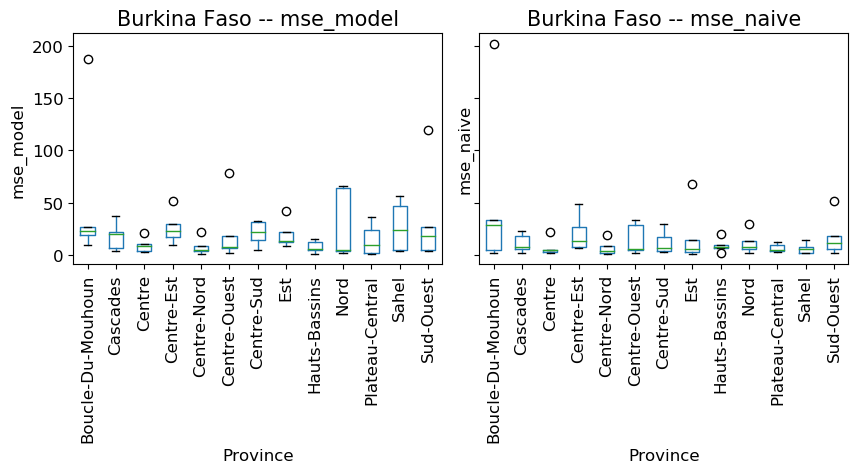

In [15]:
COUNTRIES = loss_sites.index.get_level_values(0).unique()
TYPES = loss_sites.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = 2
# Define the number of figures on y axis.
rows = len(COUNTRIES)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (5*cols, 3*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.1, hspace = 0.8)
for j,country in enumerate(COUNTRIES):
    for i,m in enumerate(TYPES):         
        value = loss_sites.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        # Create box-plot.
        value.transpose().reset_index(drop = True).boxplot(rot = 90, ax = axs[j,i])
        # Set attributes box-plot.
        axs[j,i].set_title(f"{country} -- {m}")
        axs[j,i].set_xlabel("Province")
        axs[j,i].set_ylabel(m)
        axs[j,i].grid(b = None)

## Loss of each split as function of the prediction horizon

In [16]:
colors = ["dodgerblue", "deeppink"]

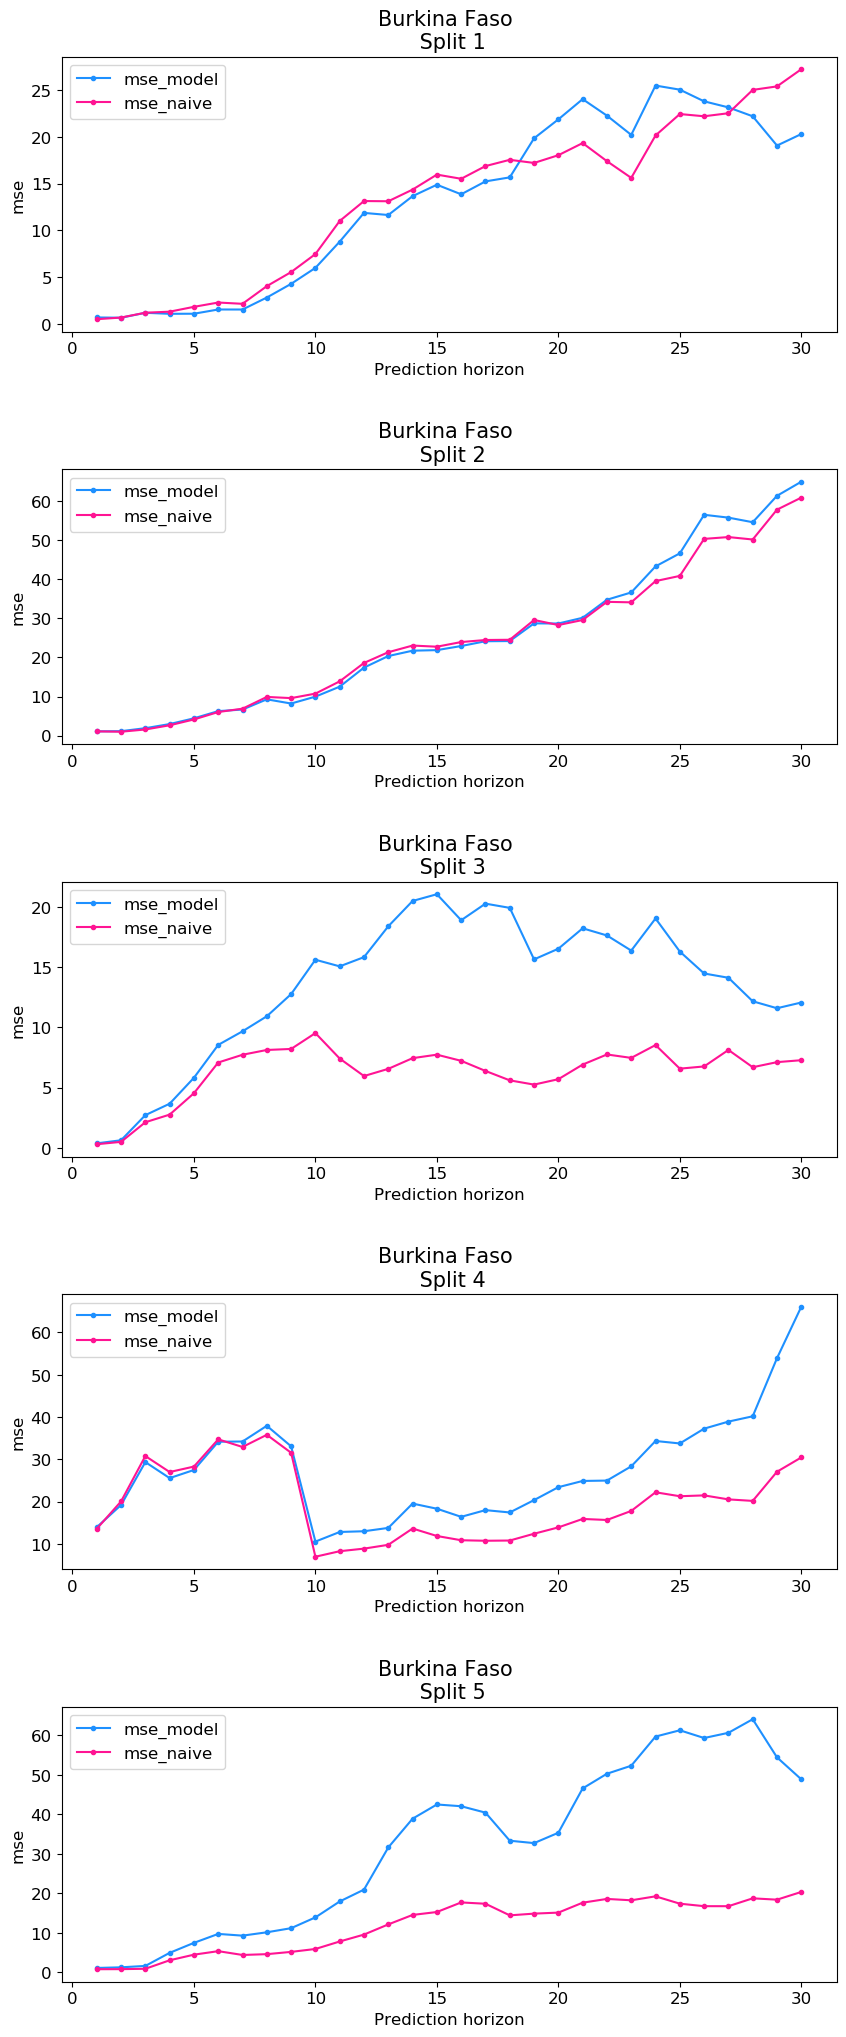

In [17]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = len(COUNTRIES)
# Define the number of figures on y axis.
rows = len(SPLITS)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, figsize = (10*cols, 5*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.05, hspace = 0.5)
for j,country in enumerate(COUNTRIES):
    for i,split in enumerate(SPLITS):      
        value = loss_h.loc[(country, split)]
        for k,m in enumerate(TYPES):  
            # Plot.
            value[m].plot(style = ".-", label = m, ax = axs[i,j], c = colors[k])
            # Set attributes of the plot.
            axs[i,j].set_title(f"{country} \n {split}")
            axs[i,j].legend(loc = "best")
            axs[i,j].set_xlabel("Prediction horizon")
            axs[i,j].set_ylabel("mse")

## Total loss over the splits as function of the prediction horizon

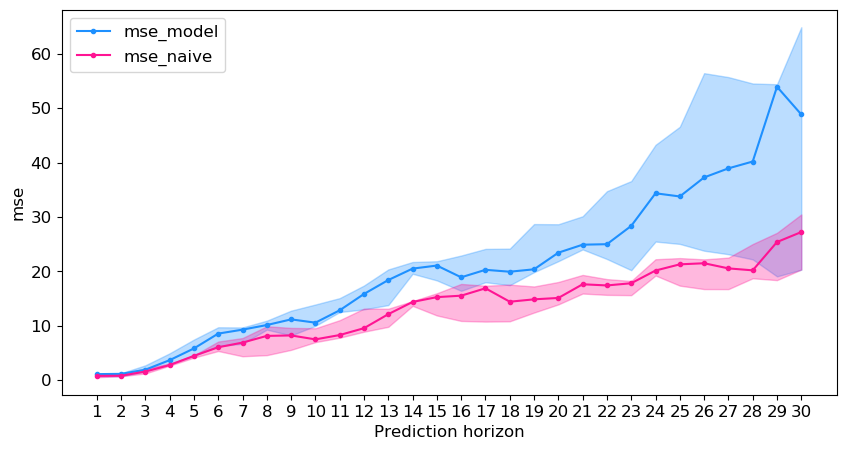

In [18]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([lambda x: x.quantile(0.25), np.median, lambda x: x.quantile(0.75)], axis = 1)
        value_statistic.columns = ["lower_quantile", "median", "upper_quantile"]

        # Plot.
        value_statistic["median"].plot(style = ".-", label = m, ax = axs, c = colors[i])
        axs.fill_between(x = value_statistic["median"].index, y1 = value_statistic["lower_quantile"], 
                         y2 = value_statistic["upper_quantile"], color = colors[i], alpha = 0.3)
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}.png", bbox_inches = "tight", dpi = 300)

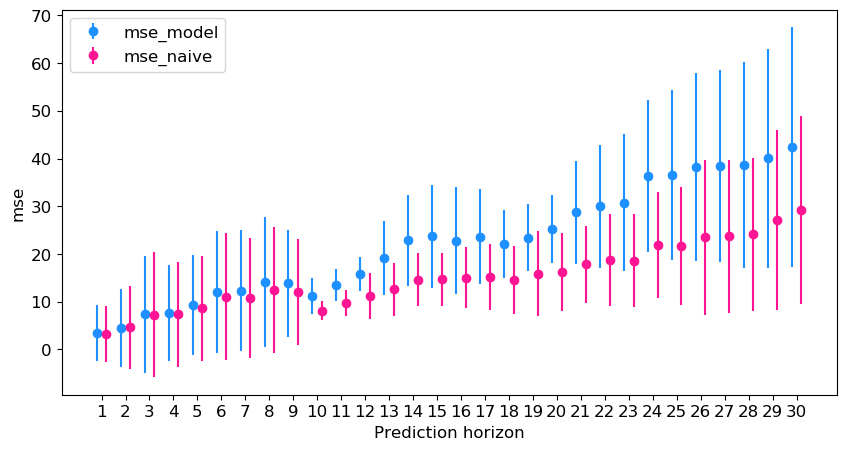

In [19]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([np.mean, np.std], axis = 1)
        value_statistic.columns = ["mean", "std"]

        # Plot.
        if i == 0:
            trans1 = Affine2D().translate(-0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans1, c = colors[i], label = m)
        else:
            trans2 = Affine2D().translate(+0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans2, c = colors[i], label = m)
        
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}_mean.png", bbox_inches = "tight", dpi = 300)

## r2 scores

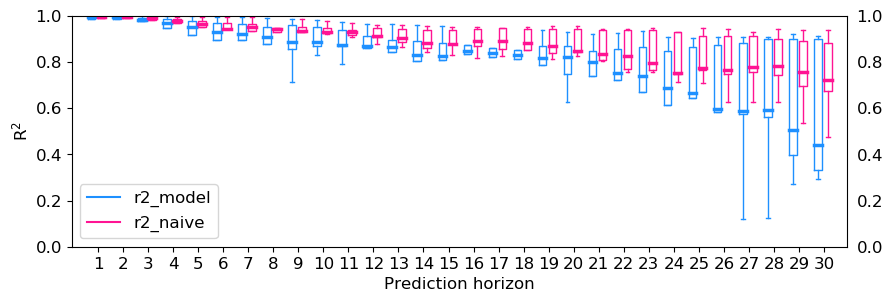

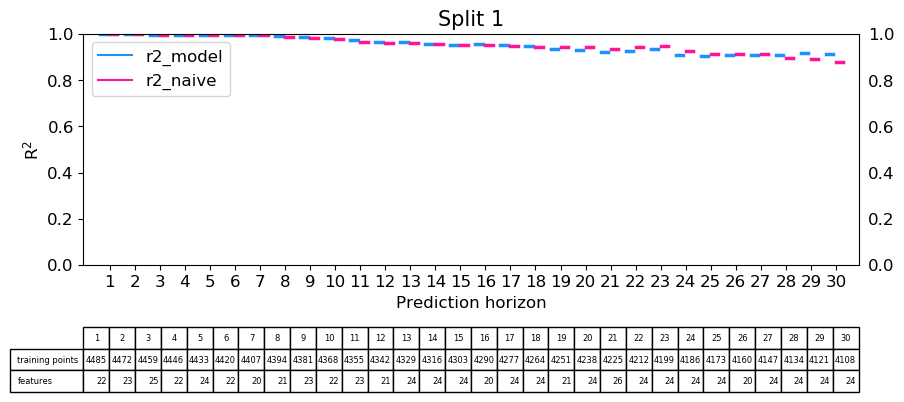

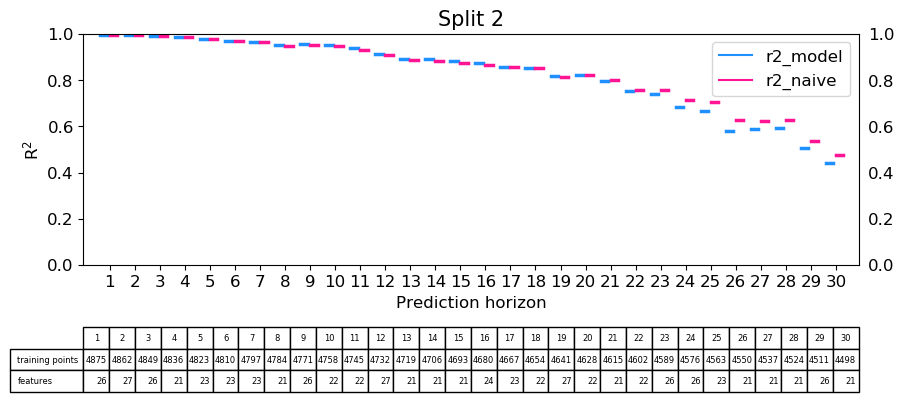

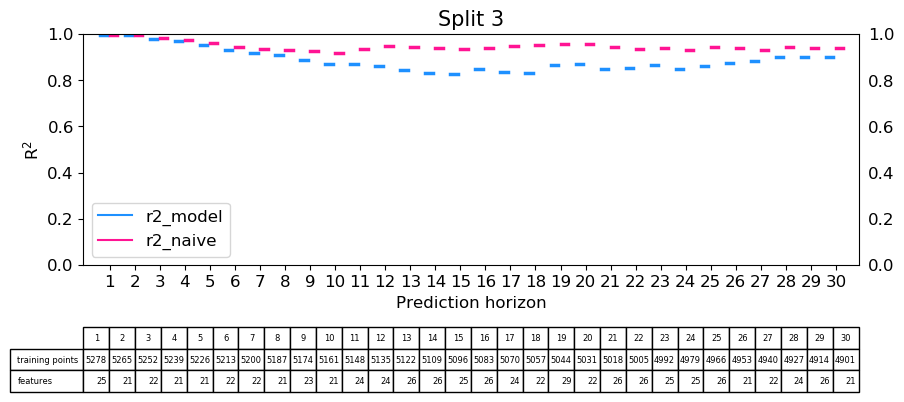

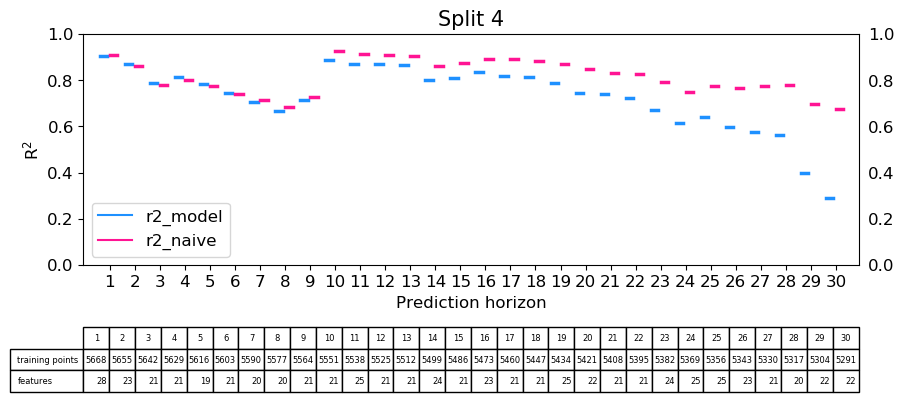

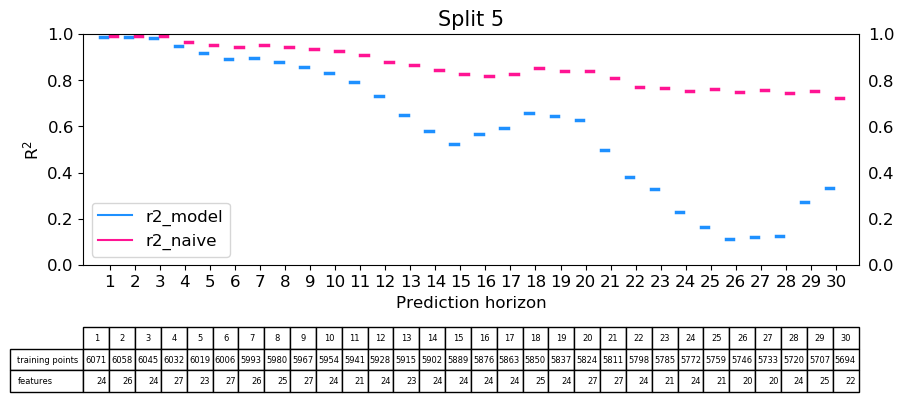

In [20]:
COUNTRIES = r2_results.columns.get_level_values(0).unique()
SPLITS = r2_results.columns.get_level_values(1).unique()

for country in COUNTRIES:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results[country], ax, "r2_model", "r2_naive")
    fig.savefig(dir_output + f"/r2_{country}.png" , bbox_inches = "tight", dpi = 300)
    for split in SPLITS:
        fig, ax = plt.subplots(figsize = (10, 3))    
        plot_r2_box_plot(r2_results[country][[split]], ax, "r2_model", "r2_naive", title = split,
                         table = training_shape[split].transpose());

## Actual vs Forecast

In [21]:
mStyles = ["s","+","x","h","v","^","o","H","*","D"]

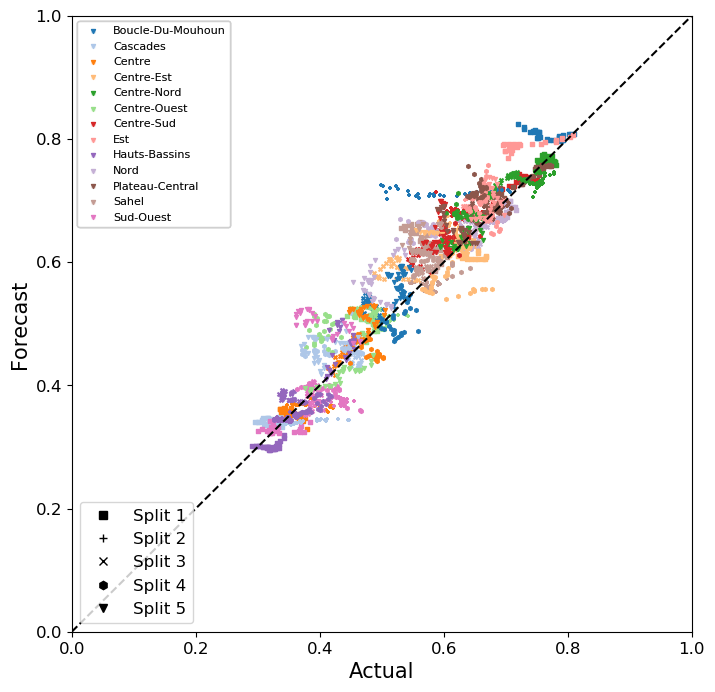

In [23]:
COUNTRIES = forecast_splits.columns.get_level_values(1).unique()
SPLITS = forecast_splits.columns.get_level_values(0).unique()

for country in COUNTRIES:
    PROVINCES = forecast_splits.xs(country, axis = 1, level = 1).columns.get_level_values(1).unique()
    colors = {province: plt.get_cmap("tab20")(i) for i,province in enumerate(PROVINCES)}
    
    fig, axs = plt.subplots(figsize = (8, 8))
    # Add bisector.
    axs.plot(axs.get_xlim(), axs.get_ylim(), color = "black", linestyle = "--")

    for i,split in enumerate(SPLITS):
        predictions = forecast_splits[(split, country)]
        predictions = predictions.drop(["Naive"], axis = 1, level = 1)
        predictions = predictions/100
   
        def plot_scatter(group):
            gr = group[group.name]
            gr.plot.scatter(x = "FCG", y = "Forecast", s = 8, marker = mStyles[i], color = colors[group.name], 
                            ax = axs, label = group.name)

        predictions.groupby(axis = 1, level = 0).apply(plot_scatter)

        # Legend.
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        leg = plt.legend(by_label.values(), by_label.keys(), loc = "upper left", prop = {"size": 8})
        axs.add_artist(leg)
        h = [plt.plot([],[], color = "black", marker = mStyles[i], ls = "")[0] for i,cplit in enumerate(SPLITS)]
        axs.legend(handles = h, labels = [split for split in SPLITS], loc = "lower left")
        axs.set_xlim(0, 1)
        axs.set_ylim(0, 1)

    axs.set_xlabel("Actual", fontsize = 15)
    axs.set_ylabel("Forecast", fontsize = 15)

    fig.savefig(dir_output + f"/scatter_{country}.png", bbox_inches = "tight", dpi = 300)